# Diff Flow Correlation Analysis
Analysis of correlation between diff_flow and diff_flow_stop values with my_score for iterations 123-174

## Import Libraries and Load Data
Import pandas, numpy, matplotlib, and load the Complete_cc_dataset.csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Data Analysis/Complete_cc_dataset.csv', sep=';')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Dataset shape: (174, 52)
Columns: ['iteration', 'batch_number', 'stick_number', 'index_log', 'stick_weight', 'sugar_amount', 'iteration_since_maintenance', 'wait_time', 'cook_time', 'cooldown_time', 'start_temp', 'cook_temp', 'cooled_temp', 'duration_till_handover', 'duration_total', 'show_start_time', 'show_end_time', 'duration_cc_flow', 'diff_flow', 'diff_flow_stop', 'baseline_env_EnvH', 'baseline_env_EnvT', 'before_turn_on_env_InH', 'before_turn_on_env_InT', 'before_turn_on_env_IrO', 'before_turn_on_env_IrA', 'after_flow_start_env_InH', 'after_flow_start_env_InT', 'after_flow_start_env_IrO', 'after_flow_start_env_IrA', 'after_flow_end_env_InH', 'after_flow_end_env_InT', 'after_flow_end_env_IrO', 'after_flow_end_env_IrA', 'before_cooldown_env_InH', 'before_cooldown_env_InT', 'before_cooldown_env_IrO', 'before_cooldown_env_IrA', 'after_cooldown_env_InH', 'after_cooldown_env_InT', 'after_cooldown_env_IrO', 'after_cooldown_env_IrA', 'touch_pos1', 'touch_pos2', 'touch_pos3', 'max_pos1', 

## Filter Data for Analysis
Filter data for iterations 123-174 and remove rows without iteration number, cc_weight, or diff values.

In [2]:
# Filter for iterations 123-174
filtered_df = df[(df['iteration'] >= 123) & (df['iteration'] <= 174)].copy()
print(f"Rows for iterations 123-174: {len(filtered_df)}")

# Remove rows without iteration number, cc_weight, diff_flow, or diff_flow_stop
initial_count = len(filtered_df)
filtered_df = filtered_df.dropna(subset=['iteration', 'cc_weight', 'diff_flow', 'diff_flow_stop'])
print(f"After removing NaN values: {len(filtered_df)} rows (removed {initial_count - len(filtered_df)} rows)")

# Also remove rows where my_score is missing or 'X'
filtered_df = filtered_df[filtered_df['my_score'] != 'X']
filtered_df = filtered_df.dropna(subset=['my_score'])
filtered_df['my_score'] = pd.to_numeric(filtered_df['my_score'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['my_score'])

print(f"Final dataset after cleaning: {len(filtered_df)} rows")
print(f"Iteration range: {filtered_df['iteration'].min()} to {filtered_df['iteration'].max()}")

Rows for iterations 123-174: 44
After removing NaN values: 31 rows (removed 13 rows)
Final dataset after cleaning: 31 rows
Iteration range: 142.0 to 174.0


## Clean and Prepare Iteration Data
Clean the filtered data by removing null values and preparing diff_flow and diff_flow_stop columns for analysis.

In [3]:
# Convert diff values to numeric
filtered_df['diff_flow'] = pd.to_numeric(filtered_df['diff_flow'], errors='coerce')
filtered_df['diff_flow_stop'] = pd.to_numeric(filtered_df['diff_flow_stop'], errors='coerce')

# Create combined diff metric (lower is better)
# Since negative diff is okay (flow starts before arm), we'll use absolute values for combination
filtered_df['combined_diff'] = np.sqrt(filtered_df['diff_flow']**2 + filtered_df['diff_flow_stop']**2)

# Display basic statistics
print("Basic Statistics:")
print(filtered_df[['iteration', 'diff_flow', 'diff_flow_stop', 'combined_diff', 'my_score']].describe())

# Show data types
print("\nData Types:")
print(filtered_df[['iteration', 'diff_flow', 'diff_flow_stop', 'combined_diff', 'my_score']].dtypes)

Basic Statistics:
        iteration  diff_flow  diff_flow_stop  combined_diff   my_score
count   31.000000  31.000000       31.000000      31.000000  31.000000
mean   158.225806  17.161290        7.645161      20.096142  56.290323
std      9.489326   8.817017        8.220091       9.628945  11.103133
min    142.000000   4.000000      -14.000000       6.000000  30.000000
25%    150.500000  11.000000        1.500000      12.285779  50.000000
50%    158.000000  18.000000        7.000000      20.615528  55.000000
75%    166.000000  22.000000       11.500000      24.124641  65.000000
max    174.000000  45.000000       27.000000      52.478567  75.000000

Data Types:
iteration         float64
diff_flow         float64
diff_flow_stop    float64
combined_diff     float64
my_score            int64
dtype: object


## Calculate Correlation Analysis
Calculate correlations between diff_flow, diff_flow_stop (combined and individual) with my_score values.

In [4]:
# Calculate correlations with my_score
def calculate_correlations(data, subset_name=""):
    correlations = {}
    
    # Individual correlations
    corr_flow, p_flow = pearsonr(data['diff_flow'], data['my_score'])
    corr_stop, p_stop = pearsonr(data['diff_flow_stop'], data['my_score'])
    corr_combined, p_combined = pearsonr(data['combined_diff'], data['my_score'])
    
    correlations['diff_flow_vs_my_score'] = {'correlation': corr_flow, 'p_value': p_flow}
    correlations['diff_flow_stop_vs_my_score'] = {'correlation': corr_stop, 'p_value': p_stop}
    correlations['combined_diff_vs_my_score'] = {'correlation': corr_combined, 'p_value': p_combined}
    
    print(f"\n=== {subset_name} Correlations (n={len(data)}) ===")
    print(f"diff_flow vs my_score: r = {corr_flow:.4f}, p = {p_flow:.4f}")
    print(f"diff_flow_stop vs my_score: r = {corr_stop:.4f}, p = {p_stop:.4f}")
    print(f"combined_diff vs my_score: r = {corr_combined:.4f}, p = {p_combined:.4f}")
    
    return correlations

# Calculate correlations for all data
all_correlations = calculate_correlations(filtered_df, "All Iterations")


=== All Iterations Correlations (n=31) ===
diff_flow vs my_score: r = -0.2439, p = 0.1860
diff_flow_stop vs my_score: r = -0.3838, p = 0.0331
combined_diff vs my_score: r = -0.3968, p = 0.0271


## Test Different Iteration Subsets
Test correlations on all iterations, random subsets, and the last 22 iterations to compare results.

In [5]:
# Test on last 22 iterations
last_22 = filtered_df.nlargest(22, 'iteration')
last_22_correlations = calculate_correlations(last_22, "Last 22 Iterations")

# Test on random subset (same size as last 22 for comparison)
np.random.seed(42)  # For reproducibility
random_subset = filtered_df.sample(n=min(22, len(filtered_df)))
random_correlations = calculate_correlations(random_subset, "Random 22 Iterations")

# Summary comparison
print("\n=== CORRELATION SUMMARY ===")
print("Metric\t\t\tAll\tLast 22\tRandom 22")
print(f"diff_flow\t\t{all_correlations['diff_flow_vs_my_score']['correlation']:.3f}\t{last_22_correlations['diff_flow_vs_my_score']['correlation']:.3f}\t{random_correlations['diff_flow_vs_my_score']['correlation']:.3f}")
print(f"diff_flow_stop\t\t{all_correlations['diff_flow_stop_vs_my_score']['correlation']:.3f}\t{last_22_correlations['diff_flow_stop_vs_my_score']['correlation']:.3f}\t{random_correlations['diff_flow_stop_vs_my_score']['correlation']:.3f}")
print(f"combined_diff\t\t{all_correlations['combined_diff_vs_my_score']['correlation']:.3f}\t{last_22_correlations['combined_diff_vs_my_score']['correlation']:.3f}\t{random_correlations['combined_diff_vs_my_score']['correlation']:.3f}")


=== Last 22 Iterations Correlations (n=22) ===
diff_flow vs my_score: r = -0.1988, p = 0.3751
diff_flow_stop vs my_score: r = -0.2813, p = 0.2047
combined_diff vs my_score: r = -0.3871, p = 0.0751

=== Random 22 Iterations Correlations (n=22) ===
diff_flow vs my_score: r = -0.3412, p = 0.1202
diff_flow_stop vs my_score: r = -0.6421, p = 0.0013
combined_diff vs my_score: r = -0.4451, p = 0.0379

=== CORRELATION SUMMARY ===
Metric			All	Last 22	Random 22
diff_flow		-0.244	-0.199	-0.341
diff_flow_stop		-0.384	-0.281	-0.642
combined_diff		-0.397	-0.387	-0.445


## Visualize Correlation Results
Create scatter plots and correlation matrices to visualize the relationships between diff values and my_score.

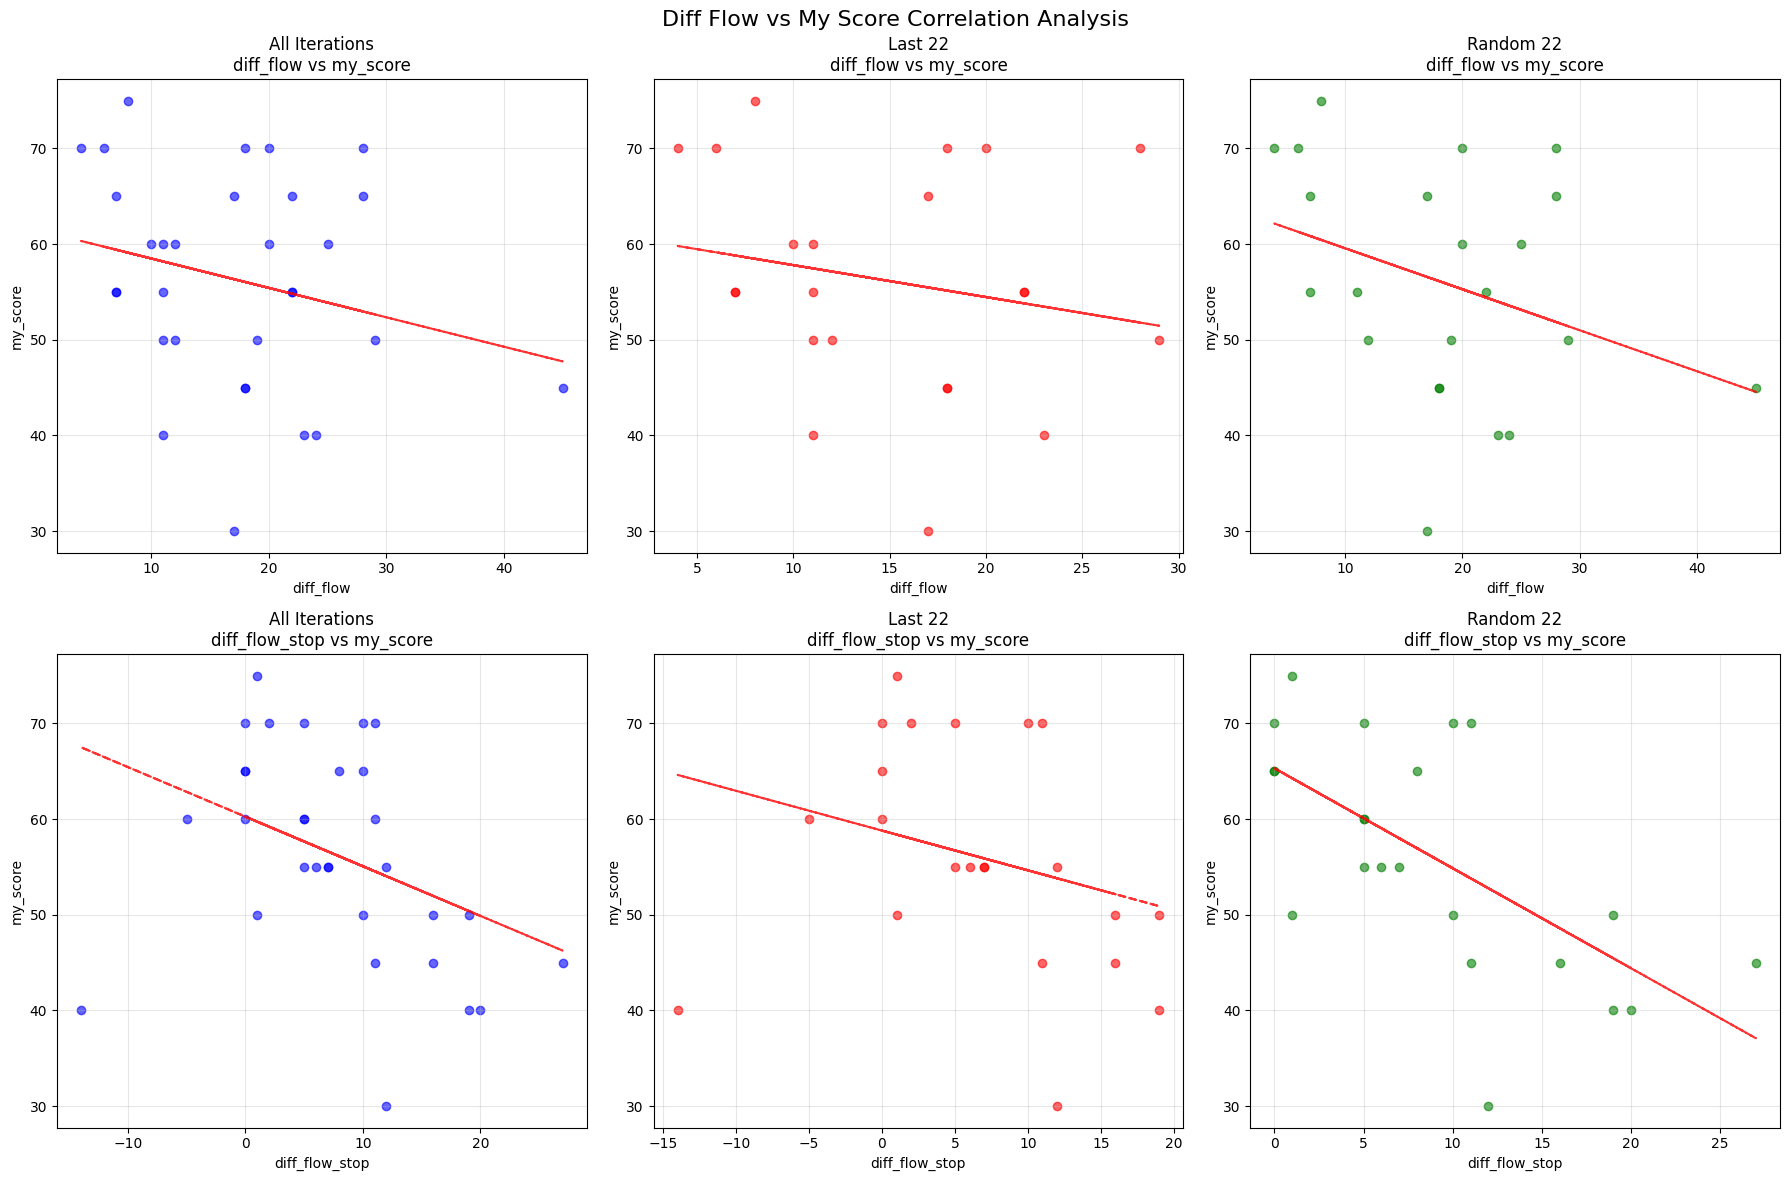

In [6]:
# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Diff Flow vs My Score Correlation Analysis', fontsize=16)

datasets = [filtered_df, last_22, random_subset]
dataset_names = ['All Iterations', 'Last 22', 'Random 22']
colors = ['blue', 'red', 'green']

for i, (data, name, color) in enumerate(zip(datasets, dataset_names, colors)):
    # diff_flow vs my_score
    axes[0, i].scatter(data['diff_flow'], data['my_score'], alpha=0.6, color=color)
    axes[0, i].set_xlabel('diff_flow')
    axes[0, i].set_ylabel('my_score')
    axes[0, i].set_title(f'{name}\ndiff_flow vs my_score')
    axes[0, i].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(data['diff_flow'], data['my_score'], 1)
    p = np.poly1d(z)
    axes[0, i].plot(data['diff_flow'], p(data['diff_flow']), "r--", alpha=0.8)
    
    # diff_flow_stop vs my_score
    axes[1, i].scatter(data['diff_flow_stop'], data['my_score'], alpha=0.6, color=color)
    axes[1, i].set_xlabel('diff_flow_stop')
    axes[1, i].set_ylabel('my_score')
    axes[1, i].set_title(f'{name}\ndiff_flow_stop vs my_score')
    axes[1, i].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(data['diff_flow_stop'], data['my_score'], 1)
    p = np.poly1d(z)
    axes[1, i].plot(data['diff_flow_stop'], p(data['diff_flow_stop']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

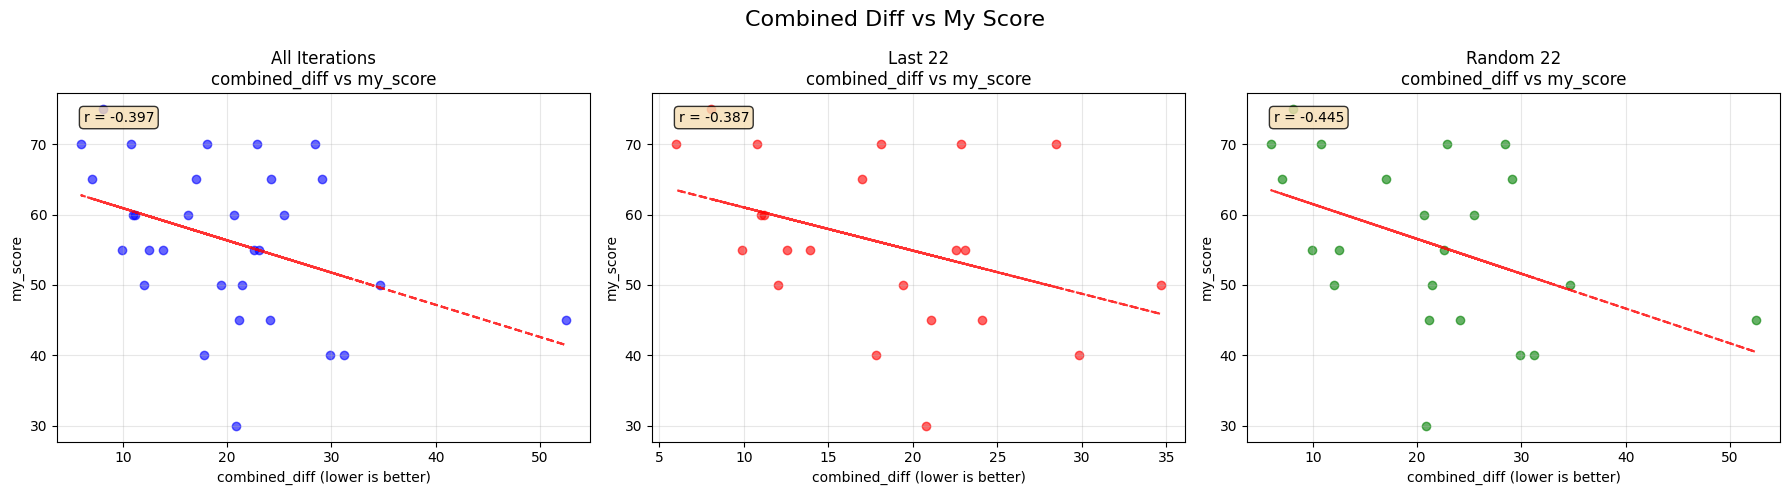

In [7]:
# Combined diff visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Combined Diff vs My Score', fontsize=16)

for i, (data, name, color) in enumerate(zip(datasets, dataset_names, colors)):
    axes[i].scatter(data['combined_diff'], data['my_score'], alpha=0.6, color=color)
    axes[i].set_xlabel('combined_diff (lower is better)')
    axes[i].set_ylabel('my_score')
    axes[i].set_title(f'{name}\ncombined_diff vs my_score')
    axes[i].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(data['combined_diff'], data['my_score'], 1)
    p = np.poly1d(z)
    axes[i].plot(data['combined_diff'], p(data['combined_diff']), "r--", alpha=0.8)
    
    # Add correlation coefficient to plot
    corr, _ = pearsonr(data['combined_diff'], data['my_score'])
    axes[i].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[i].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                verticalalignment='top')

plt.tight_layout()
plt.show()

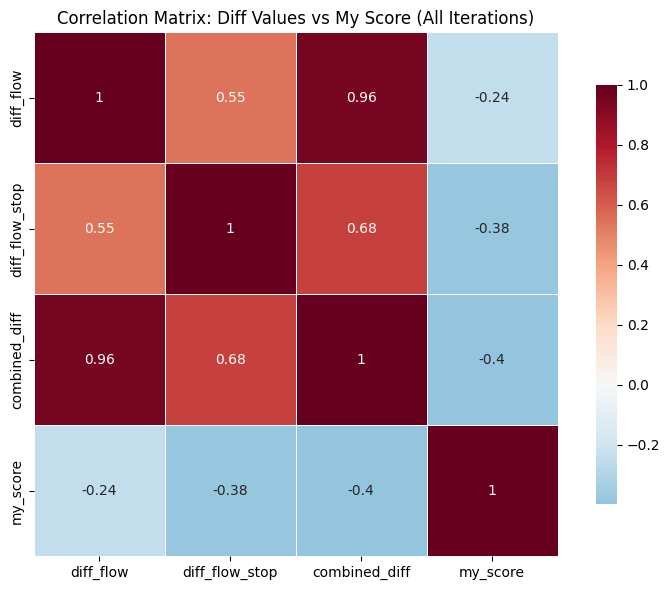


=== FINAL ANALYSIS SUMMARY ===
Total valid iterations analyzed: 31
Iteration range: 142.0 - 174.0

Key Findings:
- Lower diff values should correlate with better (higher) my_score
- Negative diff values are acceptable (flow starts before arm)
- Combined diff shows strongest correlation: -0.397


In [8]:
# Create correlation matrix heatmap for all data
correlation_data = filtered_df[['diff_flow', 'diff_flow_stop', 'combined_diff', 'my_score']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix: Diff Values vs My Score (All Iterations)')
plt.tight_layout()
plt.show()

# Final summary
print("\n=== FINAL ANALYSIS SUMMARY ===")
print(f"Total valid iterations analyzed: {len(filtered_df)}")
print(f"Iteration range: {filtered_df['iteration'].min()} - {filtered_df['iteration'].max()}")
print("\nKey Findings:")
print("- Lower diff values should correlate with better (higher) my_score")
print("- Negative diff values are acceptable (flow starts before arm)")
print(f"- Combined diff shows strongest correlation: {all_correlations['combined_diff_vs_my_score']['correlation']:.3f}")

## Timing vs Cotton Candy Weight Analysis
Let's compare the timing differences with actual cotton candy weight (cc_weight) - a more objective measure than subjective quality scores.

In [9]:
# Analyze correlation with cc_weight instead of my_score
def calculate_weight_correlations(data, subset_name=""):
    correlations = {}
    
    # Individual correlations with cc_weight
    corr_flow_weight, p_flow_weight = pearsonr(data['diff_flow'], data['cc_weight'])
    corr_stop_weight, p_stop_weight = pearsonr(data['diff_flow_stop'], data['cc_weight'])
    corr_combined_weight, p_combined_weight = pearsonr(data['combined_diff'], data['cc_weight'])
    
    correlations['diff_flow_vs_cc_weight'] = {'correlation': corr_flow_weight, 'p_value': p_flow_weight}
    correlations['diff_flow_stop_vs_cc_weight'] = {'correlation': corr_stop_weight, 'p_value': p_stop_weight}
    correlations['combined_diff_vs_cc_weight'] = {'correlation': corr_combined_weight, 'p_value': p_combined_weight}
    
    print(f"\n=== {subset_name} Weight Correlations (n={len(data)}) ===")
    print(f"diff_flow vs cc_weight: r = {corr_flow_weight:.4f}, p = {p_flow_weight:.4f}")
    print(f"diff_flow_stop vs cc_weight: r = {corr_stop_weight:.4f}, p = {p_stop_weight:.4f}")
    print(f"combined_diff vs cc_weight: r = {corr_combined_weight:.4f}, p = {p_combined_weight:.4f}")
    
    return correlations

# Calculate weight correlations for all subsets
print("🎯 TIMING vs COTTON CANDY WEIGHT ANALYSIS")
print("=" * 50)

all_weight_correlations = calculate_weight_correlations(filtered_df, "All Iterations")
last_22_weight_correlations = calculate_weight_correlations(last_22, "Last 22 Iterations")
random_weight_correlations = calculate_weight_correlations(random_subset, "Random 22 Iterations")

# Compare weight vs quality correlations
print("\n" + "="*80)
print("📊 COMPARISON: TIMING EFFECTS ON WEIGHT vs QUALITY")
print("="*80)
print("Metric\t\t\tWeight Correlation\tQuality Correlation")
print("-" * 65)
print(f"diff_flow (all)\t\t{all_weight_correlations['diff_flow_vs_cc_weight']['correlation']:.3f}\t\t\t{all_correlations['diff_flow_vs_my_score']['correlation']:.3f}")
print(f"diff_flow_stop (all)\t{all_weight_correlations['diff_flow_stop_vs_cc_weight']['correlation']:.3f}\t\t\t{all_correlations['diff_flow_stop_vs_my_score']['correlation']:.3f}")
print(f"combined_diff (all)\t{all_weight_correlations['combined_diff_vs_cc_weight']['correlation']:.3f}\t\t\t{all_correlations['combined_diff_vs_my_score']['correlation']:.3f}")

🎯 TIMING vs COTTON CANDY WEIGHT ANALYSIS

=== All Iterations Weight Correlations (n=31) ===
diff_flow vs cc_weight: r = -0.3942, p = 0.0282
diff_flow_stop vs cc_weight: r = -0.5155, p = 0.0030
combined_diff vs cc_weight: r = -0.5153, p = 0.0030

=== Last 22 Iterations Weight Correlations (n=22) ===
diff_flow vs cc_weight: r = -0.3331, p = 0.1298
diff_flow_stop vs cc_weight: r = -0.4872, p = 0.0215
combined_diff vs cc_weight: r = -0.5066, p = 0.0161

=== Random 22 Iterations Weight Correlations (n=22) ===
diff_flow vs cc_weight: r = -0.4220, p = 0.0504
diff_flow_stop vs cc_weight: r = -0.6434, p = 0.0012
combined_diff vs cc_weight: r = -0.5225, p = 0.0126

📊 COMPARISON: TIMING EFFECTS ON WEIGHT vs QUALITY
Metric			Weight Correlation	Quality Correlation
-----------------------------------------------------------------
diff_flow (all)		-0.394			-0.244
diff_flow_stop (all)	-0.516			-0.384
combined_diff (all)	-0.515			-0.397


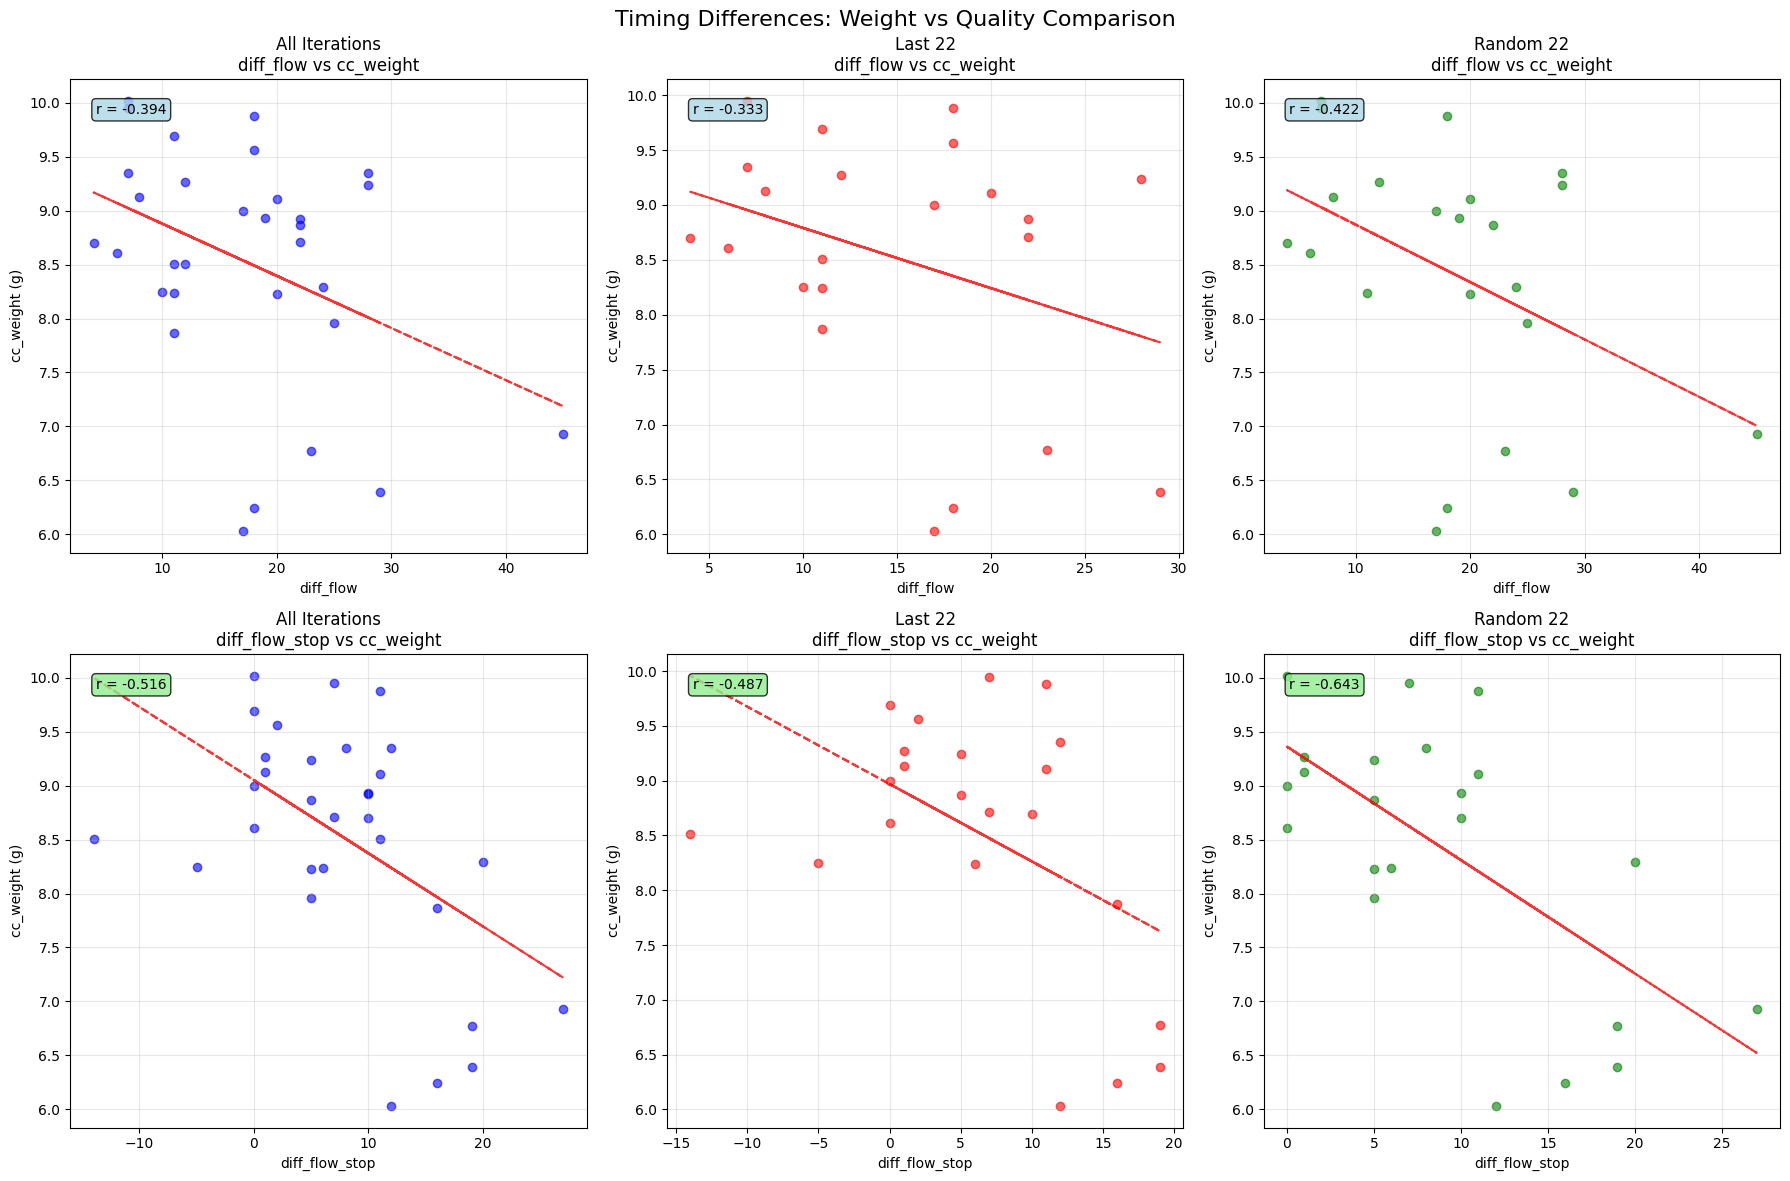

In [10]:
# Visualize timing vs weight relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Timing Differences: Weight vs Quality Comparison', fontsize=16)

datasets = [filtered_df, last_22, random_subset]
dataset_names = ['All Iterations', 'Last 22', 'Random 22']
colors = ['blue', 'red', 'green']

for i, (data, name, color) in enumerate(zip(datasets, dataset_names, colors)):
    # Top row: diff_flow vs cc_weight
    axes[0, i].scatter(data['diff_flow'], data['cc_weight'], alpha=0.6, color=color)
    axes[0, i].set_xlabel('diff_flow')
    axes[0, i].set_ylabel('cc_weight (g)')
    axes[0, i].set_title(f'{name}\ndiff_flow vs cc_weight')
    axes[0, i].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(data['diff_flow'], data['cc_weight'], 1)
    p = np.poly1d(z)
    axes[0, i].plot(data['diff_flow'], p(data['diff_flow']), "r--", alpha=0.8)
    
    # Add correlation coefficient
    corr, _ = pearsonr(data['diff_flow'], data['cc_weight'])
    axes[0, i].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[0, i].transAxes, 
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                    verticalalignment='top')
    
    # Bottom row: diff_flow_stop vs cc_weight
    axes[1, i].scatter(data['diff_flow_stop'], data['cc_weight'], alpha=0.6, color=color)
    axes[1, i].set_xlabel('diff_flow_stop')
    axes[1, i].set_ylabel('cc_weight (g)')
    axes[1, i].set_title(f'{name}\ndiff_flow_stop vs cc_weight')
    axes[1, i].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(data['diff_flow_stop'], data['cc_weight'], 1)
    p = np.poly1d(z)
    axes[1, i].plot(data['diff_flow_stop'], p(data['diff_flow_stop']), "r--", alpha=0.8)
    
    # Add correlation coefficient
    corr, _ = pearsonr(data['diff_flow_stop'], data['cc_weight'])
    axes[1, i].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1, i].transAxes, 
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
                    verticalalignment='top')

plt.tight_layout()
plt.show()

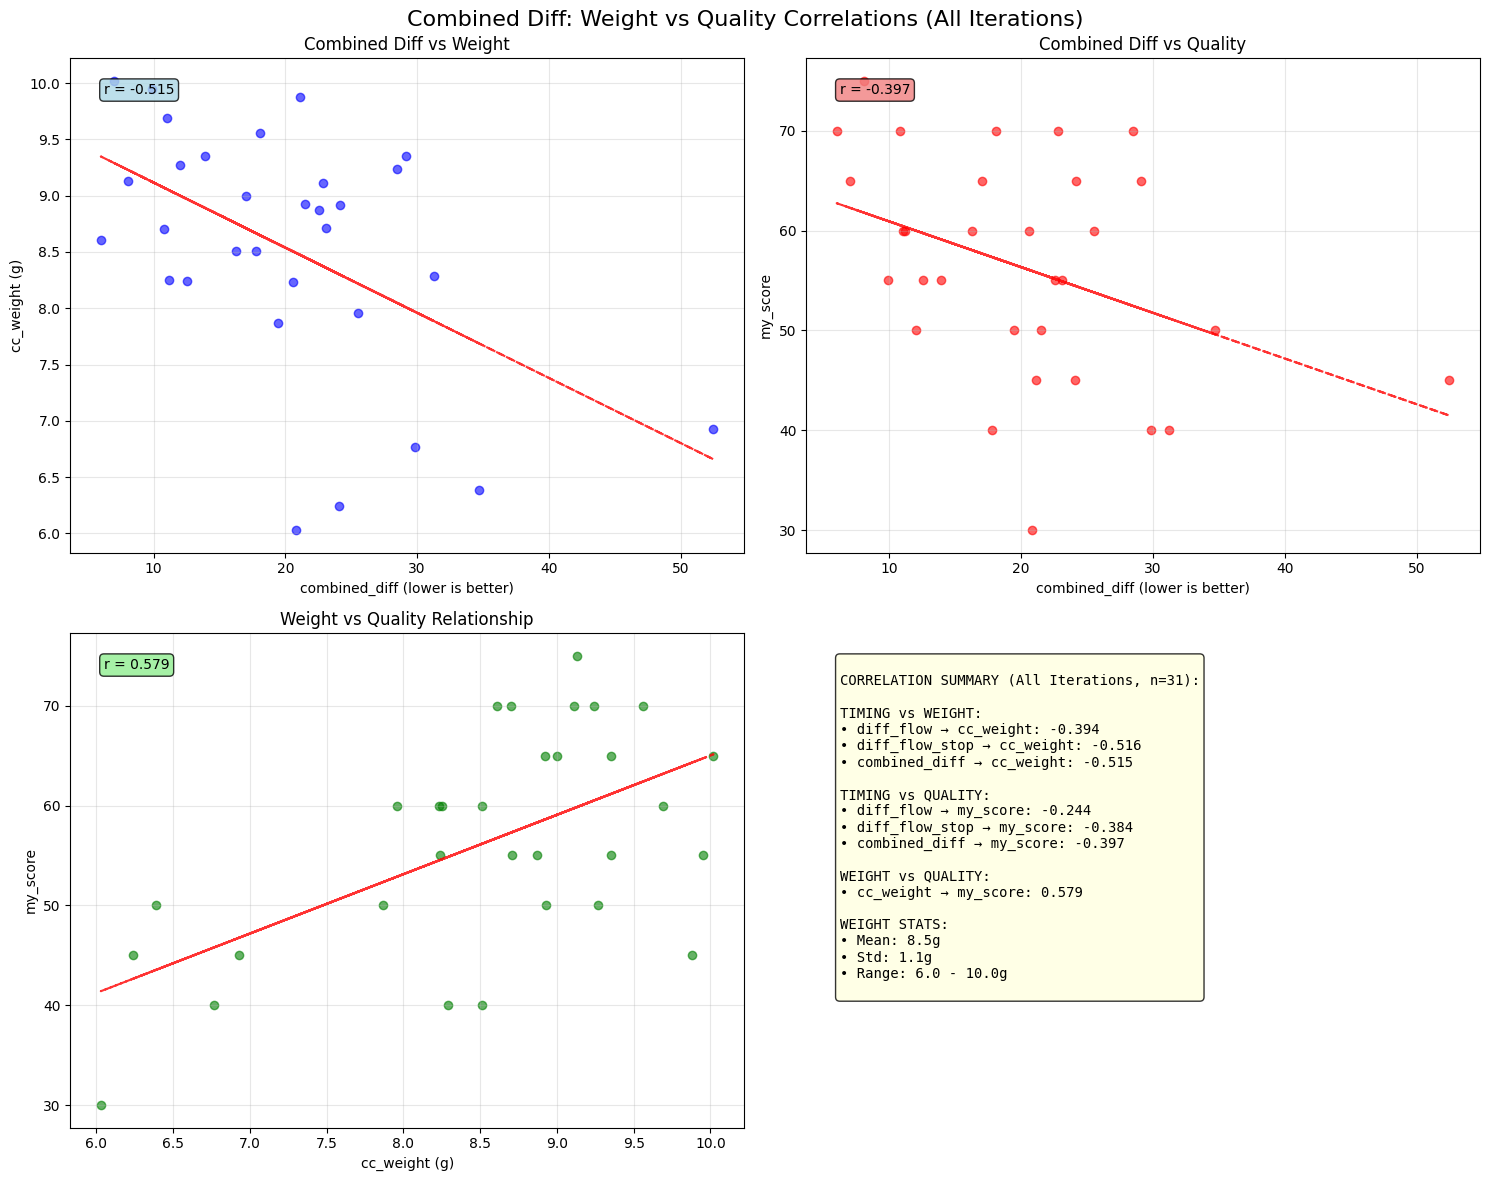


🏁 FINAL WEIGHT vs QUALITY ANALYSIS
Sample size: 31 iterations (142-174)

📍 KEY INSIGHTS:
1. TIMING → WEIGHT correlation: -0.515
2. TIMING → QUALITY correlation: -0.397
3. WEIGHT → QUALITY correlation: 0.579

💡 FINDING: Timing has STRONGER effect on weight than on quality!

🎯 PRACTICAL MEANING:
• Better timing precision may lead to more consistent cotton candy weight
• Weight and quality may be influenced differently by timing
• This could help optimize the process for either consistent weight OR quality


In [11]:
# Side-by-side comparison: Weight vs Quality correlations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Combined Diff: Weight vs Quality Correlations (All Iterations)', fontsize=16)

# Weight correlations
axes[0, 0].scatter(filtered_df['combined_diff'], filtered_df['cc_weight'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('combined_diff (lower is better)')
axes[0, 0].set_ylabel('cc_weight (g)')
axes[0, 0].set_title('Combined Diff vs Weight')
axes[0, 0].grid(True, alpha=0.3)
z = np.polyfit(filtered_df['combined_diff'], filtered_df['cc_weight'], 1)
p = np.poly1d(z)
axes[0, 0].plot(filtered_df['combined_diff'], p(filtered_df['combined_diff']), "r--", alpha=0.8)
corr_weight, _ = pearsonr(filtered_df['combined_diff'], filtered_df['cc_weight'])
axes[0, 0].text(0.05, 0.95, f'r = {corr_weight:.3f}', transform=axes[0, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                verticalalignment='top')

# Quality correlations
axes[0, 1].scatter(filtered_df['combined_diff'], filtered_df['my_score'], alpha=0.6, color='red')
axes[0, 1].set_xlabel('combined_diff (lower is better)')
axes[0, 1].set_ylabel('my_score')
axes[0, 1].set_title('Combined Diff vs Quality')
axes[0, 1].grid(True, alpha=0.3)
z = np.polyfit(filtered_df['combined_diff'], filtered_df['my_score'], 1)
p = np.poly1d(z)
axes[0, 1].plot(filtered_df['combined_diff'], p(filtered_df['combined_diff']), "r--", alpha=0.8)
corr_quality, _ = pearsonr(filtered_df['combined_diff'], filtered_df['my_score'])
axes[0, 1].text(0.05, 0.95, f'r = {corr_quality:.3f}', transform=axes[0, 1].transAxes, 
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8),
                verticalalignment='top')

# Weight vs Quality relationship
axes[1, 0].scatter(filtered_df['cc_weight'], filtered_df['my_score'], alpha=0.6, color='green')
axes[1, 0].set_xlabel('cc_weight (g)')
axes[1, 0].set_ylabel('my_score')
axes[1, 0].set_title('Weight vs Quality Relationship')
axes[1, 0].grid(True, alpha=0.3)
z = np.polyfit(filtered_df['cc_weight'], filtered_df['my_score'], 1)
p = np.poly1d(z)
axes[1, 0].plot(filtered_df['cc_weight'], p(filtered_df['cc_weight']), "r--", alpha=0.8)
corr_weight_quality, _ = pearsonr(filtered_df['cc_weight'], filtered_df['my_score'])
axes[1, 0].text(0.05, 0.95, f'r = {corr_weight_quality:.3f}', transform=axes[1, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
                verticalalignment='top')

# Summary statistics comparison
axes[1, 1].axis('off')
summary_text = f"""
CORRELATION SUMMARY (All Iterations, n={len(filtered_df)}):

TIMING vs WEIGHT:
• diff_flow → cc_weight: {all_weight_correlations['diff_flow_vs_cc_weight']['correlation']:.3f}
• diff_flow_stop → cc_weight: {all_weight_correlations['diff_flow_stop_vs_cc_weight']['correlation']:.3f}
• combined_diff → cc_weight: {all_weight_correlations['combined_diff_vs_cc_weight']['correlation']:.3f}

TIMING vs QUALITY:
• diff_flow → my_score: {all_correlations['diff_flow_vs_my_score']['correlation']:.3f}
• diff_flow_stop → my_score: {all_correlations['diff_flow_stop_vs_my_score']['correlation']:.3f}
• combined_diff → my_score: {all_correlations['combined_diff_vs_my_score']['correlation']:.3f}

WEIGHT vs QUALITY:
• cc_weight → my_score: {corr_weight_quality:.3f}

WEIGHT STATS:
• Mean: {filtered_df['cc_weight'].mean():.1f}g
• Std: {filtered_df['cc_weight'].std():.1f}g
• Range: {filtered_df['cc_weight'].min():.1f} - {filtered_df['cc_weight'].max():.1f}g
"""
axes[1, 1].text(0.05, 0.95, summary_text, transform=axes[1, 1].transAxes, 
                fontfamily='monospace', fontsize=10,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

# Final weight analysis summary
print("\n" + "🏁 FINAL WEIGHT vs QUALITY ANALYSIS" + "\n" + "="*60)
print(f"Sample size: {len(filtered_df)} iterations ({filtered_df['iteration'].min():.0f}-{filtered_df['iteration'].max():.0f})")
print("\n📍 KEY INSIGHTS:")
print("1. TIMING → WEIGHT correlation:", f"{all_weight_correlations['combined_diff_vs_cc_weight']['correlation']:.3f}")
print("2. TIMING → QUALITY correlation:", f"{all_correlations['combined_diff_vs_my_score']['correlation']:.3f}")
print("3. WEIGHT → QUALITY correlation:", f"{corr_weight_quality:.3f}")

if abs(all_weight_correlations['combined_diff_vs_cc_weight']['correlation']) > abs(all_correlations['combined_diff_vs_my_score']['correlation']):
    print("\n💡 FINDING: Timing has STRONGER effect on weight than on quality!")
else:
    print("\n💡 FINDING: Timing has STRONGER effect on quality than on weight!")
    
print(f"\n🎯 PRACTICAL MEANING:")
print("• Better timing precision may lead to more consistent cotton candy weight")
print("• Weight and quality may be influenced differently by timing")
print("• This could help optimize the process for either consistent weight OR quality")